In [59]:
import pandas as pd
import modules.utils.paths as path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = path.make_dir_function('.')
data_dir = list(data_dir('data', 'raw', 'diabetes').resolve().glob('*.csv'))[0]

In [4]:
diabetes_df = pd.read_csv(data_dir)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Understanding Data Types**

We can understand the data types of our model. Pandas uses 'dtypes' to identify each column.

Note: In some cases, categorical data will not be indicated explicitly, and you will have to use your judgment based on what you know about the dataset to determine if the modeling is appropriate.

int64 represents integers. Integers are useful when it comes to labeling something or having discrete groups. For example, someone can have 1 or 2 children, but not 1.5 children.
They are also useful for representing a category mapping. For example, imagine you have 3 cities where "1" means "New York City," "2" means "San Francisco," and "3" means "Philadelphia."

float64 represents floating-point numerical values. These are used to represent continuous values, for example, BMI or insulin, where decimals/fractions are allowed.

In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### **2a: Challenge Questions**
From the following questions, you must identify the data type that would be used in each situation. Leave your results in the comments of the class where you found this notebook.

Question 1 <br>

You have a dataset of sales information for electronic devices. One of the columns in the dataset describes what the product is: tablet, smartphone, TV, computer. What type of data is this? <br>

Question 2 <br>

From the same dataset of electronic devices mentioned earlier, you have information about the price of each item. What type of data is this? <br>

Question 3 <br>
You have information about the mileage (distance traveled) of various cars at a dealership. What type of information is this? <br>

### 2b: Understanding the Data - Missing Values

Before diving into preliminary analysis, make sure there are no missing values. They are usually indicated as "`NaN`" or "Not a Number."

Use the `dropna()` method to check if there are rows that should not be counted.

Note: `dropna()` will remove the row if any individual column has a missing feature. Alternatively, you can specify whether this is the appropriate approach or if you want to delete only rows where the entire column's information is missing.

In [7]:
(
    diabetes_df
        .isnull()
        .sum()
)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
(
    diabetes_df
        .dropna()
        .isnull()
        .sum()
)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **3: Representing Patterns in Your Data**

Given our dataset, we want to be able to determine whether someone has diabetes or not, as indicated by the outcome column.

A 1 indicates that the patient has diabetes, while 0 suggests that they do not have it. We want to learn if pre-existing conditions (age, blood pressure, insulin, BMI) can contribute to diabetes.

We will use histograms and scatter plots to observe how the groups/population in our data behave. It's a good practice to do this before building a model.

In [8]:
plt.rcParams['font.size'] = 15

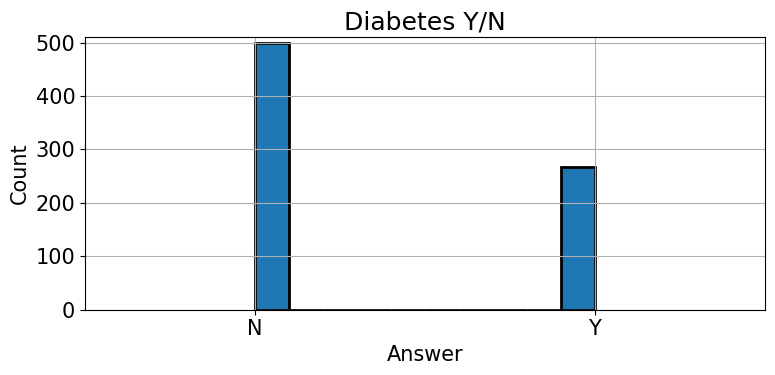

In [9]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1, 1, 1)
diabetes_df['Outcome'].hist(ax=ax, edgecolor='black', linewidth=2)
ax.set_xlim([-0.5, 1.5])
ax.set_xticks([0, 1])
ax.set_xticklabels(["N", "Y"])
ax.set_title("Diabetes Y/N")
ax.set_xlabel("Answer")
ax.set_ylabel("Count")
ax.set_ylim([0, 510])
f.tight_layout()
f.show()

##### Playing with bindwidth

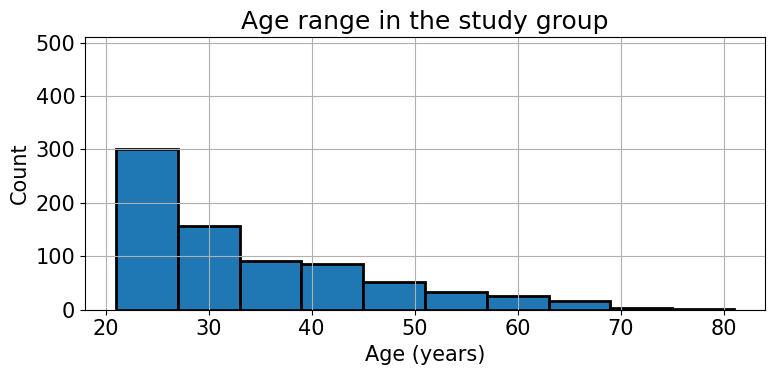

In [17]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1, 1, 1)
diabetes_df['Age'].hist(ax=ax, edgecolor='black', linewidth=2)
ax.set_title("Age range in the study group")
ax.set_ylim([0, 510])
ax.set_xlabel("Age (years)")
ax.set_ylabel("Count")
f.tight_layout()
f.show()

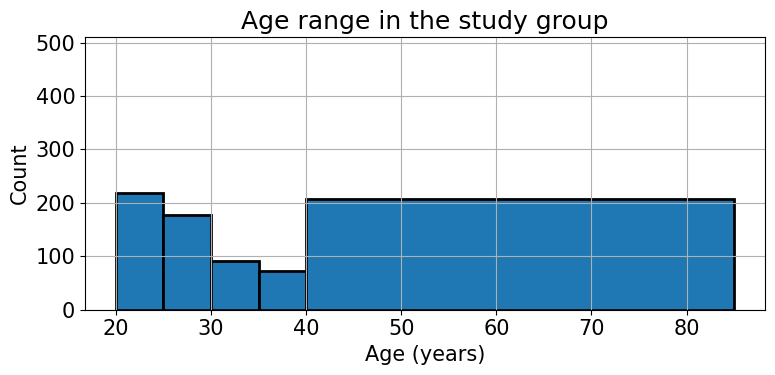

In [14]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1, 1, 1)
diabetes_df['Age'].hist(ax=ax, edgecolor='black', linewidth=2, bins=[20, 25, 30, 35, 40, 85])
ax.set_title("Age range in the study group")
ax.set_ylim([0, 510])
ax.set_xlabel("Age (years)")
ax.set_ylabel("Count")
f.tight_layout()
f.show()

#### **3b: Representing Patterns in Your Data - Scatterplots**

Histograms display data in sets conveniently based on counts. Sometimes, you may want to see how certain features or columns relate to each other.

To do this, we use a **scatterplot**. A scatterplot shows each data point from your dataset as a relationship between two features that you specify.

Remember that this is done by taking 2 columns from the dataset and plotting, for each row, the value of $(f_1, f_2)$ where $f$ represents a feature or column on the x and y axes, respectively.

We will create a plot between _BloodPressure_ (x) and _Age_ (y). For this, we assume that younger people have lower blood pressure (BloodPressure).

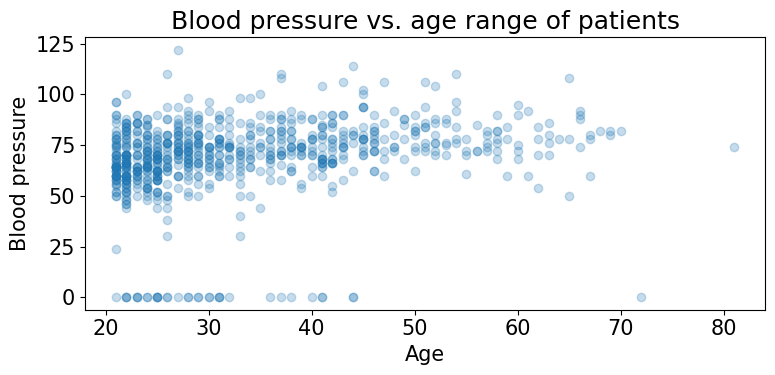

In [18]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(diabetes_df["Age"], diabetes_df["BloodPressure"], alpha=0.25)
ax.set_title("Blood pressure vs. age range of patients")
ax.set_ylabel("Blood pressure")
ax.set_xlabel("Age")
f.tight_layout()

### **Note something interesting here! There are several people with a blood pressure of 0! From a medical perspective, this is very unusual.**

Scatterplots help us understand how our data may contain inappropriate or missing information. In the previous case, it's highly unlikely for people to have a blood pressure of 0, but it's more likely that the medical professional didn't have this data available or it wasn't measured. We don't want to train models with this kind of information.

For the following steps, we can consider these points as outliers or anomalies. In this case, it would be appropriate to remove them from the dataset to ensure that we train our model only with complete and reported values.

To do this, we will use Pandas to select only the rows in our dataset where BloodPressure > 0.

In [22]:
diabetes_df[diabetes_df.BloodPressure <= 0].shape

(35, 9)

Exists 35 values which present a BloodPressure of 0, so cleaning this we have:

In [24]:
diabetes_df = diabetes_df[diabetes_df.BloodPressure > 0]
diabetes_df.shape

(733, 9)

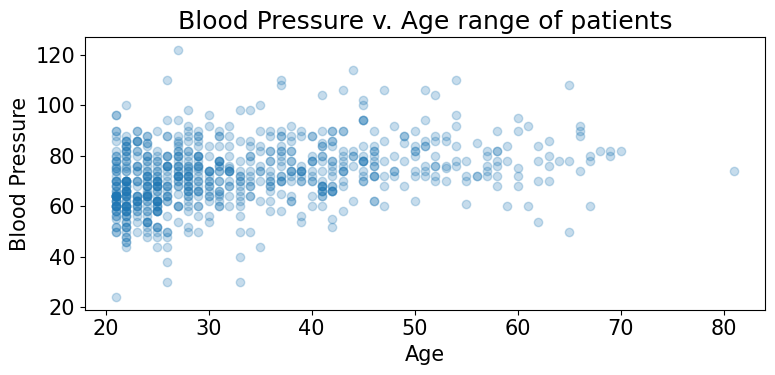

In [26]:
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(diabetes_df["Age"], diabetes_df["BloodPressure"], alpha=0.25)
ax.set_title("Blood Pressure v. Age range of patients")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")
f.tight_layout()

Now we can see that we have a somewhat clearer trend:

Older patients tend to have a higher likelihood of having higher blood pressure.
Younger patients may be more scattered.

#### **3b: Challenge Exercise 1**

Let's take it a step further. Graph this blood pressure analysis considering whether people are diabetic or not (Outcome = 1 or Outcome = 0).

In the following code block, I'll first provide you with an example for people with diabetes. Create the second plot for people without diabetes.

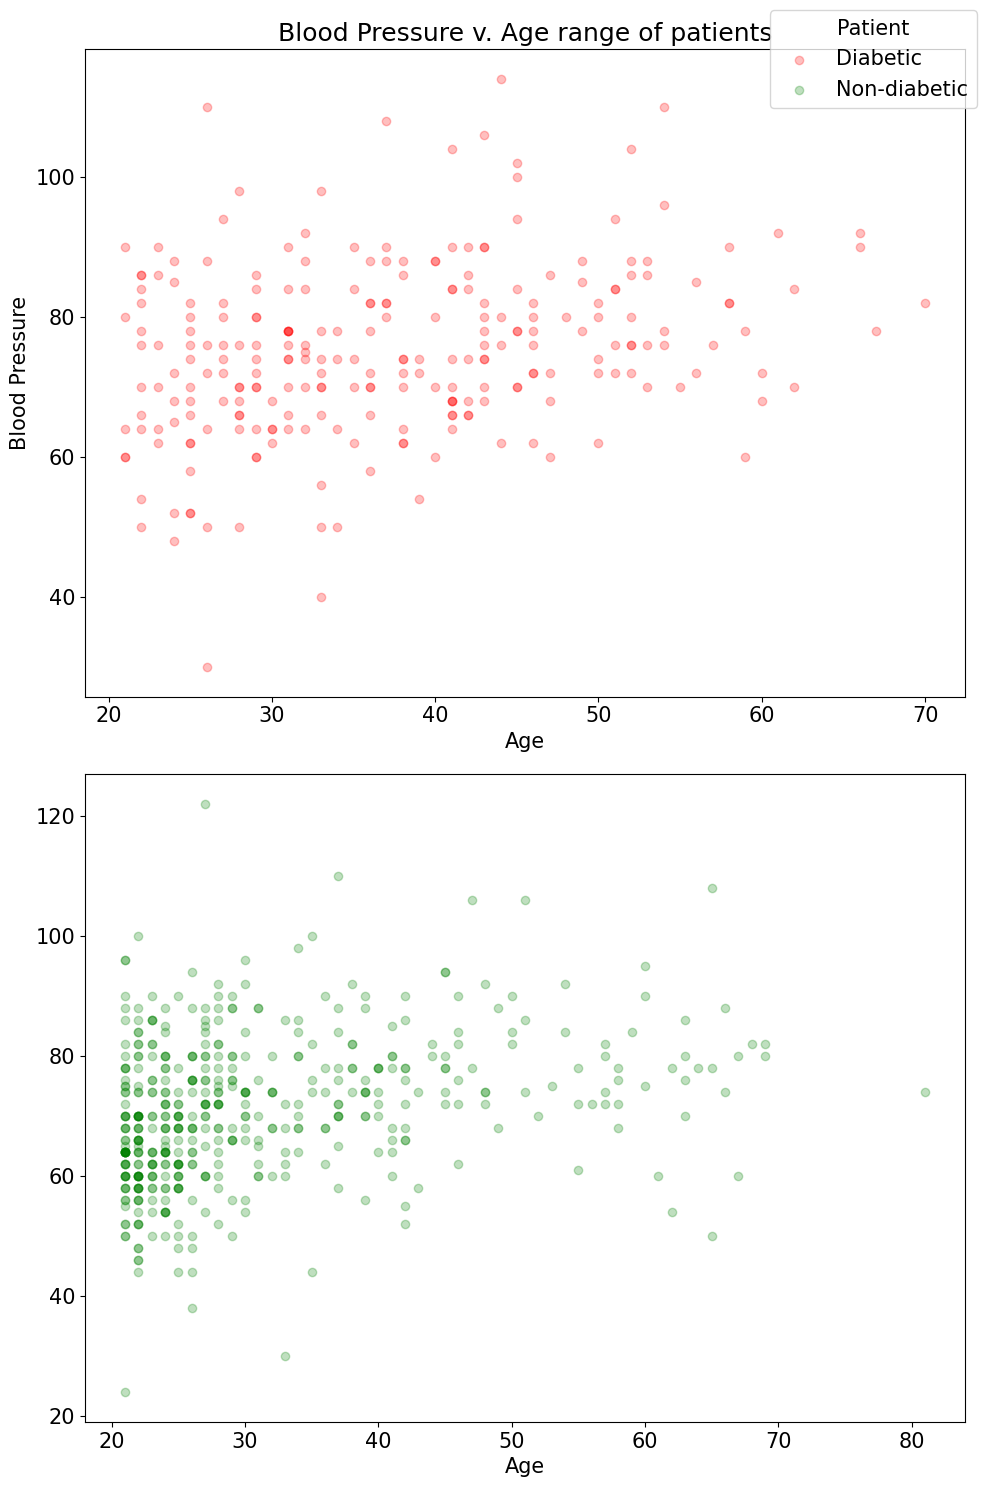

In [58]:
diabetic = diabetes_df[diabetes_df.Outcome == 1]
non_diabetic = diabetes_df[diabetes_df.Outcome == 0]

plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(10,15))
ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["Age"], diabetic["BloodPressure"], alpha=0.25, color='red')
ax.set_title("Blood Pressure v. Age range of patients", loc='center')
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")

ax = f.add_subplot(2,1,2)
ax.scatter(non_diabetic["Age"], non_diabetic["BloodPressure"], alpha=0.25, color='green')
ax.set_xlabel("Age")
f.legend(title="Patient", labels=['Diabetic', 'Non-diabetic'])

f.tight_layout()

It is straight to highlight that younger people tends to not present a high blood pressure and therefore a less likelihood of suffering diabetes, age influences significantly in the health condition.

<Figure size 1500x900 with 0 Axes>

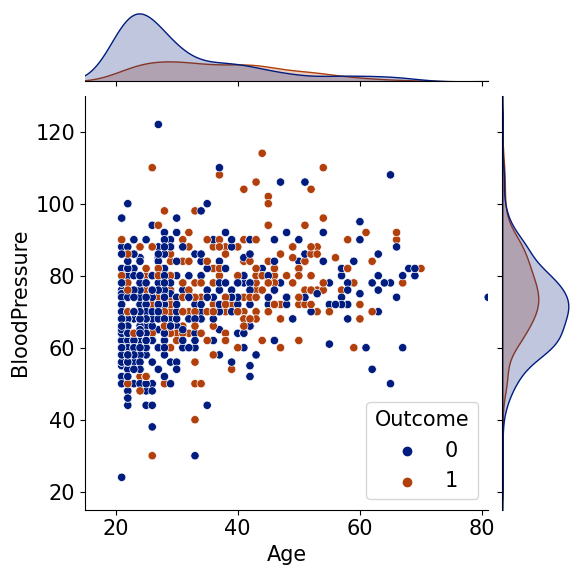

In [101]:
plt.figure(figsize=(10, 6), dpi=150)
sns.jointplot(
    data=diabetes_df,
    x='Age',
    y='BloodPressure',
    kind='scatter',
    hue='Outcome',
    palette='dark'
)
plt.xlim(15, 81)
plt.ylim(15, 130)
plt.show()

### **4: Preparing for Building Machine Learning Models**

For the last part of the notebook, we will discuss how to think about building a model for this dataset.

Broadly, machine learning algorithms can generally be categorized into three large domains: supervised learning, unsupervised learning, and reinforcement learning. Our course will cover the first two components.

Machine learning algorithms can be classified into three main domains:

**Supervised Learning**: It involves training a model to predict an output or outcome.

**Unsupervised Learning**: This type of learning asks a model to understand how to group your data without any pre-defined target or outcome.

It is very useful when you need to segment your data into categories or identify features or characteristics for groupings within your data. This is typically done using clustering or dimensionality reduction techniques.

For our diabetes dataset, we want to predict whether a patient has this condition or not. This can be thought of as labels "Yes - has diabetes" or "No - does not have diabetes." Therefore, this type of data would benefit from classification using supervised learning.

### **4: Challenge Questions**

Next, I'll give you a couple of examples to try to understand what types of models you should use. Respond in the class comments to which type of algorithm the situation refers.

**Question 1** <br>

You have a dataset from a clothing company, and you want to predict the volume of dress sales for the next month. What type of problem is this? <br>

**Question 2** <br>

Similar to the first question, you're using a clothing dataset. Instead of predicting the sales volume, you want to know if you will sell at least 1000 of a particular type of dress. What type of problem is this? <br>

**Question 3** <br>

You have information on how customers buy clothes in your store. You have a dataset of their purchases segmented into categories: the number of pants, shirts, dresses, and skirts each customer buys. You want to segment your customers into different groups so you can send ads to each group based on what they want to wear. What type of problem could this be?